# Homework 4: Clustering

## Data

We will use a data set about beer for our clustering homework.

In [2]:
import pandas as pd
beer = pd.read_csv('data/beer.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [3]:
X = beer.drop('name', axis=1)

**Note**

We don't need a Y as our target variable, because clustering is an unsupervised learning, 

** Standardize the data **

Standardization of a dataset is a common requirement for many machine learning estimators. sk-learn provides a convenient function "StandardScaler" for this purpose: it standardize features by removing the mean and scaling to unit variance.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## K-means clustering

### Task 1: use the K-means algorithm to make 3 (k=3) clusters of the beer data.

Question 1.1: What do the clusters seem to be based on? Why?

[[ 0.5361335   0.96264295  0.51632566 -0.61618888]
 [-0.92065895 -0.6352664  -0.86290041 -0.33288365]
 [ 0.7690509  -0.6547531   0.69314951  1.89814505]]
Cluster 1
[[ 0.38791334  0.00779468  0.43380786 -0.45682969]
 [ 0.6250656   0.63136906  0.62241997 -0.45682969]
 [ 0.42179223  1.25494344  0.3395018  -1.5192243 ]
 [ 1.43815906  1.41083704  1.1882563  -0.66930861]
 [ 0.55730781  1.87851782  0.43380786 -0.52765599]
 [ 0.25239776  0.47547547  0.3395018  -0.38600338]
 [ 0.21851887  0.63136906  0.15088969 -0.45682969]
 [ 0.38791334  1.41083704  0.62241997 -0.45682969]]


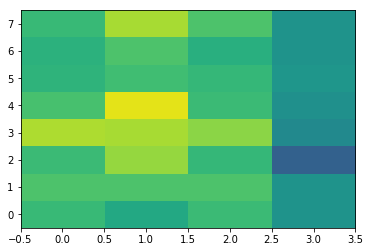

Cluster 2
[[ 0.82833896  0.00779468 -3.14982226 -0.10269815]
 [-1.1366369  -0.7716733   0.05658363 -0.45682969]
 [-0.66233238 -1.08346049 -0.5092527  -0.66930861]
 [-1.03500022  0.00779468 -0.13202848 -0.24435076]
 [ 0.08300329 -0.6157797  -0.03772242  0.03895447]
 [-2.18688263  0.00779468 -1.82953748 -0.81096123]
 [-2.05136705 -1.39524768 -1.26370115 -0.24435076]
 [-1.20439469 -1.23935408 -0.03772242 -0.17352445]]


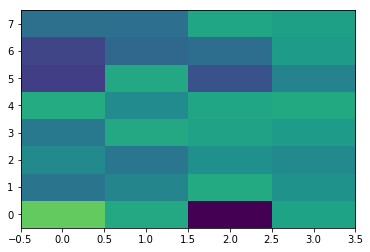

Cluster 3
[[ 1.26876459 -1.23935408  0.90533814  1.66795955]
 [ 0.65894449 -0.6157797   0.71672602  1.95126478]
 [ 0.59118671  0.63136906  0.43380786  1.88043848]
 [ 0.55730781 -1.39524768  0.71672602  2.0929174 ]]


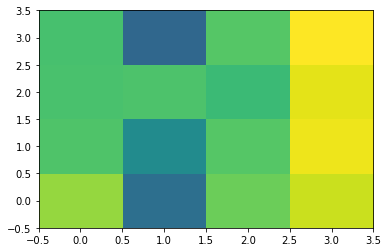

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
predictions = kmeans.predict(X)
centroids = kmeans.cluster_centers_
print centroids



lower_limit = X.min()
upper_limit = X.max()

print "Cluster 1"
print X[np.where(predictions == 0)]
fig = plt.figure(1)
plt.clf()
plt.imshow(X[np.where(predictions == 0)], interpolation='nearest',
           aspect='auto', origin='lower')
plt.clim(lower_limit, upper_limit)
plt.show()

print "Cluster 2"
print X[np.where(predictions == 1)]
fig = plt.figure(2)
plt.clf()
plt.imshow(X[np.where(predictions == 1)], interpolation='nearest',
           aspect='auto', origin='lower')
plt.clim(lower_limit, upper_limit)
plt.show()

print "Cluster 3"
print X[np.where(predictions == 2)]
fig = plt.figure(3)
plt.clf()
plt.imshow(X[np.where(predictions == 2)], interpolation='nearest',
           aspect='auto', origin='lower')
plt.clim(lower_limit, upper_limit)


plt.show()

The clusters seem to be based on cost. As we notice, the three clusters seem to have a very strong variation in the last column (cost). 

### Task 2: Plot all data points on scatter charts. Each chart displays data on two attributes, so there will be 6 charts in total. Use different colors for clusters. Also plot cluster centers with a different symbol from beer data points. 

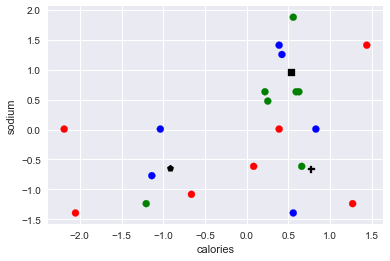

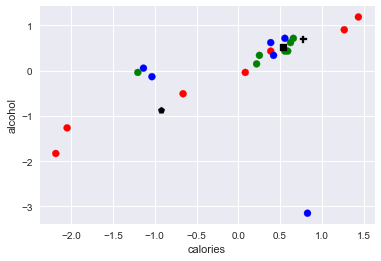

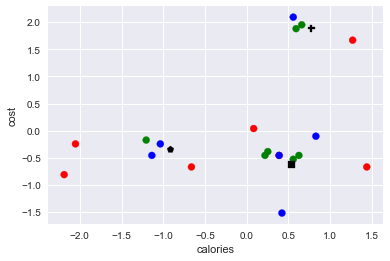

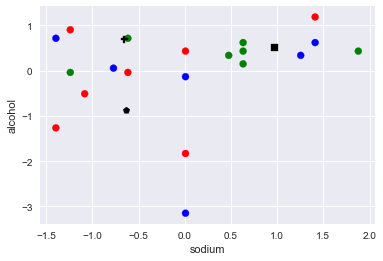

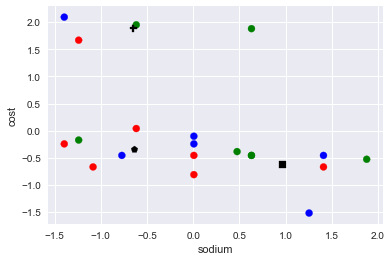

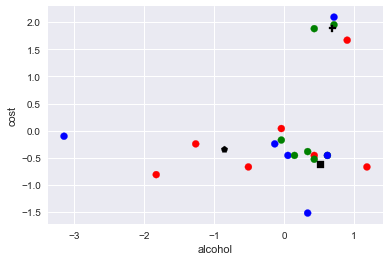

In [83]:
from matplotlib import markers

label_color = ['r', 'g', 'b']

for i in range(0,4):
    for j in range (i+1, 4):
        plt.scatter(X[:, i], X[:, j], c=label_color)
        plt.scatter(centroids[0][i], centroids[0][j], marker='s', color = 'black')
        plt.scatter(centroids[1][i], centroids[1][j], marker='p', color = 'black')
        plt.scatter(centroids[2][i], centroids[2][j], marker='P', color = 'black')

        plt.xlabel(beer.columns.values[i+1])
        plt.ylabel(beer.columns.values[j+1])
        plt.show()

## Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

## Task 3: compute Silhouette coefficients for k-means models with k=2 to 19. Plot the results with a line chart. What k value do you think the optimal?

k =  2 SS:  0.330715064698
k =  3 SS:  0.457774159109
k =  4 SS:  0.475464122522
k =  5 SS:  0.444065827016
k =  6 SS:  0.365390111402
k =  7 SS:  0.339076317037
k =  8 SS:  0.307628892366
k =  9 SS:  0.269898262169
k =  10 SS:  0.26720480055
k =  11 SS:  0.254958988241
k =  12 SS:  0.268134227174
k =  13 SS:  0.258062449856
k =  14 SS:  0.195103671845
k =  15 SS:  0.183977694006
k =  16 SS:  0.123329231554
k =  17 SS:  0.132725179192
k =  18 SS:  0.0979539106367
k =  19 SS:  0.0535723484586


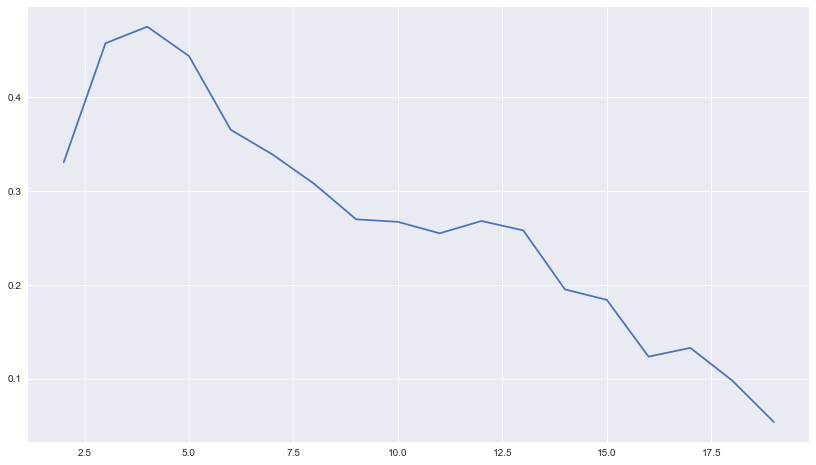

In [103]:
from sklearn import metrics

scores = []
k = []
for i in range (2,20):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = metrics.silhouette_score(X, labels, metric='euclidean')
    print "k = ", i, "SS: ", score
    k += [i]
    scores += [score]

plt.plot(k, scores)

Optimal value = 4, as we notice a maxima at k = 4